## Regression Training - Simple Regression

In [1]:
# Load all libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.neighbors

### 1. Exercise - Automobile Data
- **Source**: UCI Machine Learning Repository
- **Link**: https://archive.ics.uci.edu/ml/datasets/Automobile

In [2]:
data_path = "C:/Users/miros/Downloads/imports-85.data"

### Load data

In [3]:
data =  pd.read_csv(data_path, sep=",")

In [4]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Hypothesis: Does cars' horsepower correlate to price?

In [5]:
# Drop all columns except for "horsepower" and "price"

# Remove all columns between column name 'symboling' to 'compression-ratio'
data.drop(data.loc[:, 'symboling':'compression-ratio'].columns, inplace=True, axis=1)

In [6]:
# Remove columns "peak-rpm","city-mpg", and "highway-mpg"
data.drop(['peak-rpm','city-mpg','highway-mpg'], inplace=True, axis=1)

In [7]:
data.head()

,horsepower,price
0,111,13495
1,111,16500
2,154,16500
3,102,13950
4,115,17450


### Data understanding:

1. Data info
2. Check for None values
3. Check for NaN values

In [8]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   horsepower  205 non-null    object
 1   price       205 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


Our data is of type **"object"** so pandas description will not yield numerical overview such as Min, Max or Std

In [9]:
data.describe()

,horsepower,price
count,205,205
unique,60,187
top,68,?
freq,19,4


There are some **non numerical values** in the dataset (such as "?"). We must decide what to do with those.

In [10]:
# Check for None values:
data.isnull().sum()

horsepower    0
price         0
dtype: int64

### Convert data from object to int

In [11]:
# Find out which rows contain the non numerical data:
data.loc[data['horsepower'] == '?']

,horsepower,price
130,?,9295
131,?,9895


In [12]:
# Find out which rows contain the non numerical data:
data.loc[data['price'] == '?']

,horsepower,price
9,160,?
44,70,?
45,70,?
129,288,?


In [13]:
# Drop rows containing non numerical data:
data.drop([9, 44, 45, 129, 130, 131], inplace=True)

In [14]:
# Convert object data to int:
data['horsepower'] = data['horsepower'].fillna(0).astype(int)
data['price'] = data['price'].fillna(0).astype(int)

### Data visualization

Text(0, 0.5, 'Horsepower')

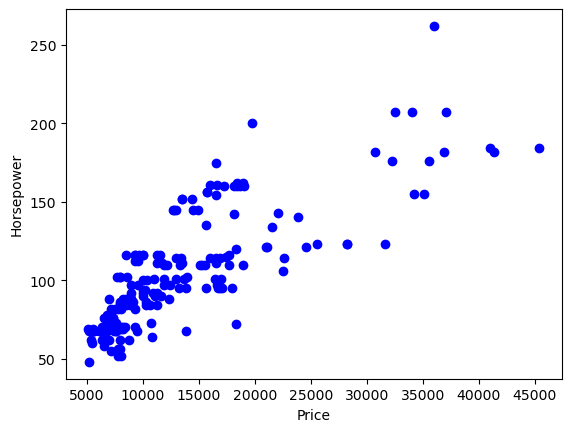

In [15]:
# X-axis is price
# Y-axis is horsepower

plt.plot(data["price"], data["horsepower"],'bo')
plt.xlabel('Price')
plt.ylabel('Horsepower')

I will try fitting a **line through the data** to simulate what linear regression does by trial and error.

Remember that the **linear equation** is expressed as:

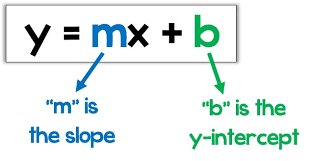

In machine learning by convention, the Greek letter $\theta$ is frequently used to represent model parameters. The linear equation in Machine learning terms would then be rewritten as follows:

$ y = \theta_{0} + \theta_{1}*x $

Where,

$\theta_{0}$ = **intercept** <br>
$\theta_{1}$ = **slope**

First, lets try to set **intercept** $\theta_{0}$ to $50$ and **slope** $\theta_{1}$ to $8 \times 10^{-3}$

Text(5000, 200, '$\\theta_1 = 8 \\times 10^{-3}$')

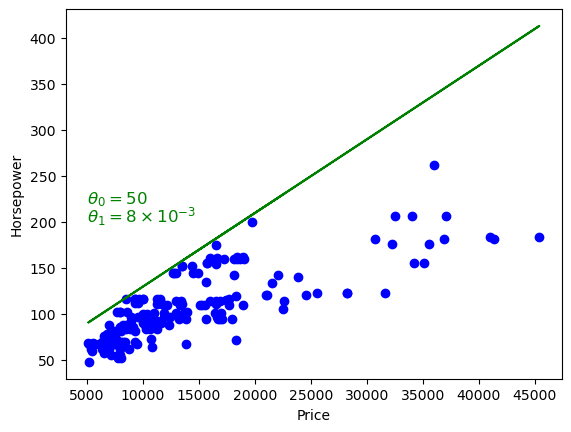

In [16]:
plt.plot(data["price"], data["horsepower"],'bo')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.plot(data["price"], 50 + 8*data["price"]/1000, "g")
plt.text(5000, 220, r"$\theta_0 = 50$", fontsize=12, color="g")
plt.text(5000, 200, r"$\theta_1 = 8 \times 10^{-3}$", fontsize=12, color="g")

This **somewhat fits** the data for price to horsepower correlation but **it is not ideal**. Let's try to adjust the parameters and see what happens: <br>
$\theta_0 = 50$ <br>
$\theta_1 = 1 \times 10^{-3}$

Text(35000, 60, '$\\theta_1 = 1 \\times 10^{-3}$')

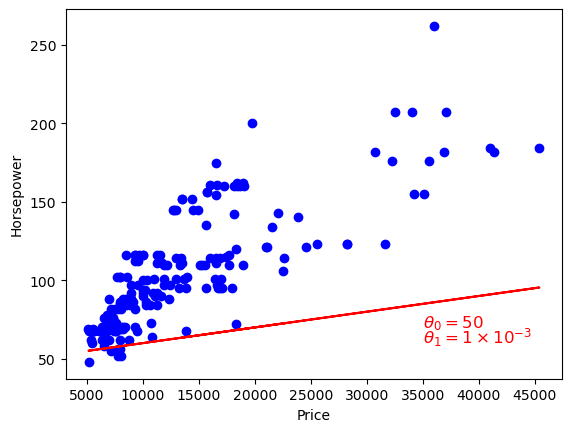

In [17]:
plt.plot(data["price"], data["horsepower"],'bo')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.plot(data["price"], 50 + 1*data["price"]/1000, "r")
plt.text(35000, 70, r"$\theta_0 = 50$", fontsize=12, color="r")
plt.text(35000, 60, r"$\theta_1 = 1 \times 10^{-3}$", fontsize=12, color="r")

Now the slope is too gentle. We need to tweek it further. Lets try: <br>
$\theta_0 = 35$ <br>
$\theta_1 = 5 \times 10^{-3}$

Text(35000, 60, '$\\theta_1 = 5 \\times 10^{-3}$')

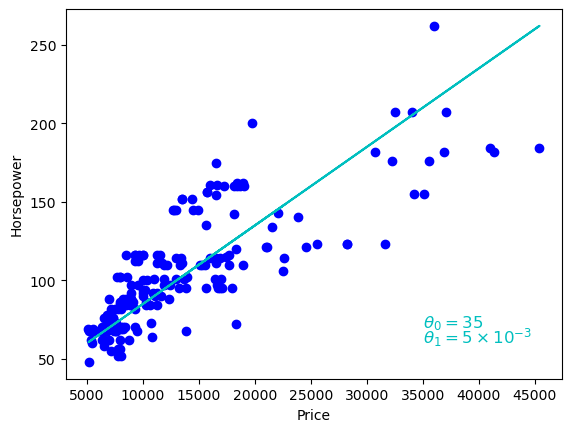

In [33]:
plt.plot(data["price"], data["horsepower"],'bo')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.plot(data["price"], 35 + 5*data["price"]/1000, "c")
plt.text(35000, 70, r"$\theta_0 = 35$", fontsize=12, color="c")
plt.text(35000, 60, r"$\theta_1 = 5 \times 10^{-3}$", fontsize=12, color="c")

**This looks OK**. Let's see **if the linear regression can improve the parameters** we found by trial and error.

### Linear regression

- to improve the trial and error linear equation for correlation between car price and horsepower

In [19]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [20]:
# Prepare features and labels
X = data["price"].values
y = data["horsepower"].values

In [21]:
X.shape

(199,)

Linear Regression expects the input for features (X) to be in a **shape of 2D array not 1D array**. So we need to reshape it.

In [24]:
X = X.reshape(-1, 1)
X.shape

(199, 1)

In [25]:
# Train the model
model.fit(X, y)

LinearRegression()

Let's see what the **Linear Regression** has chosen as the **ideal linear model/function** give the Car data for price vs. horsepower:

In [30]:
print(f"Intercept = {model.intercept_}")
print(f"Slope = {model.coef_}")

Intercept = 52.873519713955005
Slope = [0.00381498]


Let's see what that looks like on the graph: <br>
$\theta_0 = 52.87$ <br>
$\theta_1 = 3.814 \times 10^{-3}$

Text(30000, 60, '$\\theta_1 = 3.814 \\times 10^{-3}$')

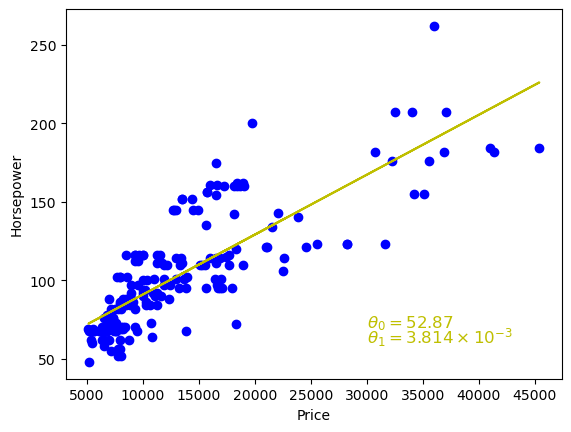

In [34]:
plt.plot(data["price"], data["horsepower"],'bo')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.plot(data["price"], 52.87 + 3.814*data["price"]/1000, "y")
plt.text(30000, 70, r"$\theta_0 = 52.87$", fontsize=12, color="y")
plt.text(30000, 60, r"$\theta_1 = 3.814 \times 10^{-3}$", fontsize=12, color="y")

Predict the horsepower of a car based on it's price:

In [37]:
X_new = [[15000]]  # Hypothetical car has a price of 15 000
print(model.predict(X_new))

predicted_horsepower = model.predict(X_new)

[110.09826093]


Let's see how that prediction looks like on a graph:

Text(16000, 30, 'Prediction = [110.09826093]')

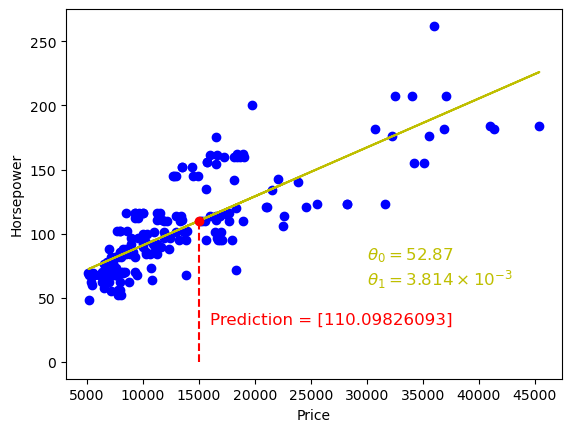

In [47]:
plt.plot(data["price"], data["horsepower"],'bo')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.plot(data["price"], 52.87 + 3.814*data["price"]/1000, "y")
plt.text(30000, 80, r"$\theta_0 = 52.87$", fontsize=12, color="y")
plt.text(30000, 60, r"$\theta_1 = 3.814 \times 10^{-3}$", fontsize=12, color="y")
# Print a line from price of 15000 to it's predicted horsepower on the linear equation line
plt.plot([15000, 15000],[0, predicted_horsepower], 'r--')
# Print a dot on the linear equation line where the price of 15000 corresponds to horsepower
plt.plot(15000, predicted_horsepower, "ro")
# Description text for the dotted red line
plt.text(16000, 30, f"Prediction = {predicted_horsepower}", fontsize=12, color="r")